In [4]:
import os
import sys
base_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, base_path)

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass
from pltwidget import runwidget
from helperFunctions import MoviePlotter, convert_to_numpy, convert_to_tiff

In [5]:
cd ..

/sdf/data/lcls/ds/xpp/xppl1026722/results/LH_Tomography/TomoMono


In [31]:
aligned_proj_location = "alignedProjections/aligned_manuallyPrepped_XCA&PMA_20250522-145702.tif"
kevinProjections, kevin_proj_scale_info = convert_to_numpy(aligned_proj_location)

notAligned_proj_location = "data/fullTomoReconstructions_3_3_25.tif"
notAlignedProjections, notAligned_proj_scale_info = convert_to_numpy(notAligned_proj_location)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

def plot_two_centroids(data_3d_1, data_3d_2):
    def normalize_image(img):
        return np.square(img)

    def calculate_centroids(data_3d):
        centroids = []
        for img in data_3d:
            normalized_img = normalize_image(img)
            h, w = normalized_img.shape
            h_start, h_end = h // 5, 4 * h // 5
            w_start, w_end = w // 5, 4 * w // 5
            cropped_img = normalized_img[h_start:h_end, w_start:w_end]
            centroid = center_of_mass(cropped_img)
            if centroid[0] is not None and centroid[1] is not None:
                centroids.append((centroid[0] - (h_end-h_start)/2, centroid[1] - (w_end-w_start)/2))
            else:
                centroids.append((np.nan, np.nan))
        return np.array(centroids)

    if len(data_3d_1.shape) != 3 or len(data_3d_2.shape) != 3:
        raise ValueError("Both input arrays must be 3-dimensional.")

    centroids_1 = calculate_centroids(data_3d_1)
    centroids_2 = calculate_centroids(data_3d_2)

    y_coords_1, x_coords_1 = centroids_1[:, 0], centroids_1[:, 1]
    y_coords_2, x_coords_2 = centroids_2[:, 0], centroids_2[:, 1]

    plt.figure(figsize=(6, 4))
    plt.scatter(x_coords_2, y_coords_2, color="red", alpha=0.3, label="Pre-Alignment")
    plt.scatter(x_coords_1, y_coords_1, color="blue", alpha=0.3, label="Post-Alignment")

    plt.xlabel("X Coordinate", fontsize=16)
    plt.ylabel("Y Coordinate", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.xlim(-100, 100)
    plt.ylim(-15, 65)

    plt.legend(
        loc="lower left", ncol=1,
        frameon=True, facecolor='lightgray', edgecolor='black',
        fontsize=16
    )
    plt.grid()
    plt.tight_layout()
    plt.savefig("centroidComparison.png")
    plt.show()

    for i in range(5):
        h, w = data_3d_1[i*20].shape
        h_start, h_end = h // 5, 4 * h // 5
        w_start, w_end = w // 5, 4 * w // 5
        cropped_img = data_3d_1[i*20][h_start:h_end, w_start:w_end]

        plt.imshow(cropped_img)
        plt.scatter(
            x_coords_1[i*20] + (w_end-w_start)/2,
            y_coords_1[i*20] + (h_end-h_start)/2,
            color="blue"
        )
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.show()

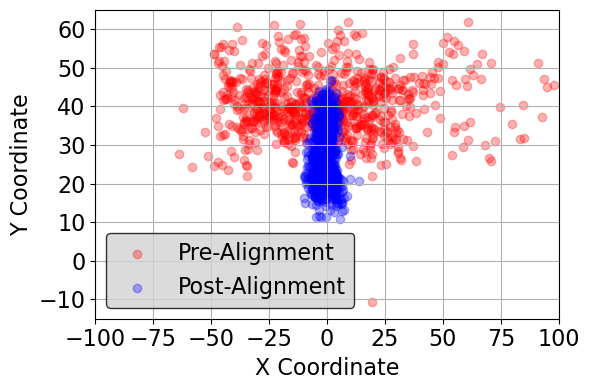

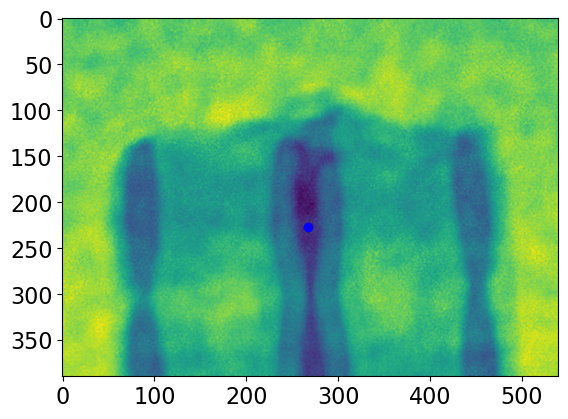

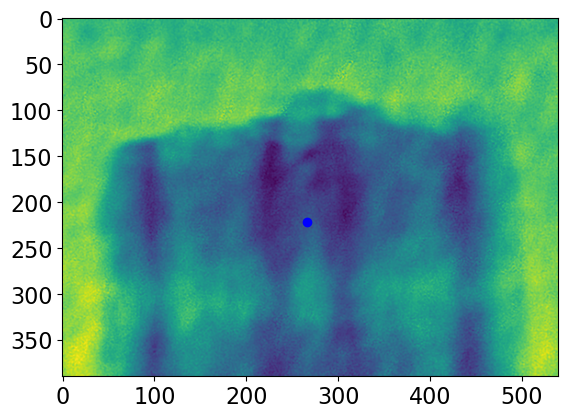

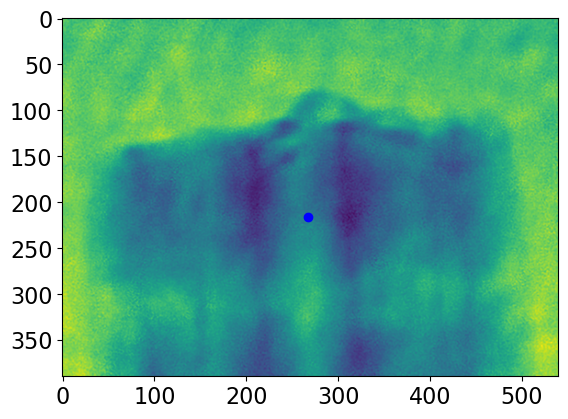

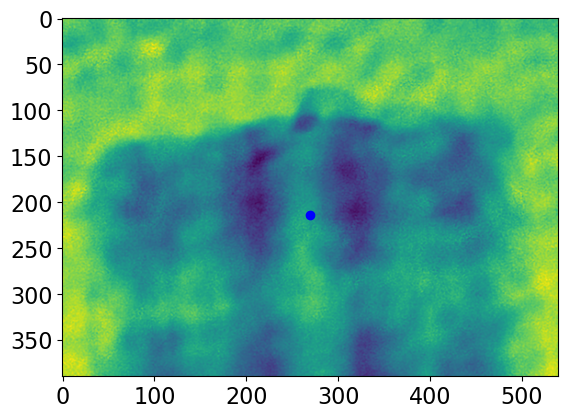

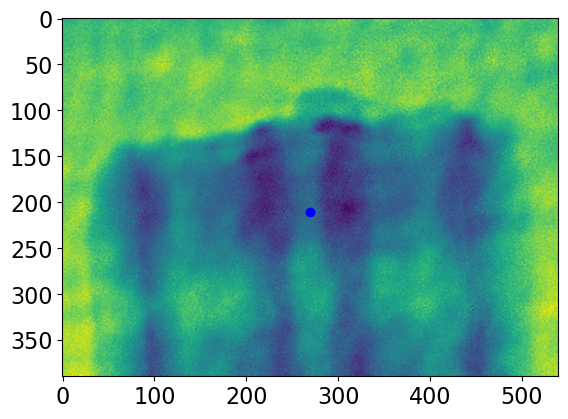

In [45]:
# Plot the centroids
plot_two_centroids(kevinProjections, notAlignedProjections)

In [ ]:
def normalize_image(img):
    """Shift the image to make all values positive."""
    return img - np.min(img)

centroid = center_of_mass(normalize_image(kevinProjections[0]))
print(centroid)
print(kevinProjections[0].shape)
plt.imshow(kevinProjections[0])
plt.show()

In [ ]:
# runwidget(kevinProjections[0:100])
MoviePlotter(notAlignedProjections[0:10,130:-130, 180:-180])